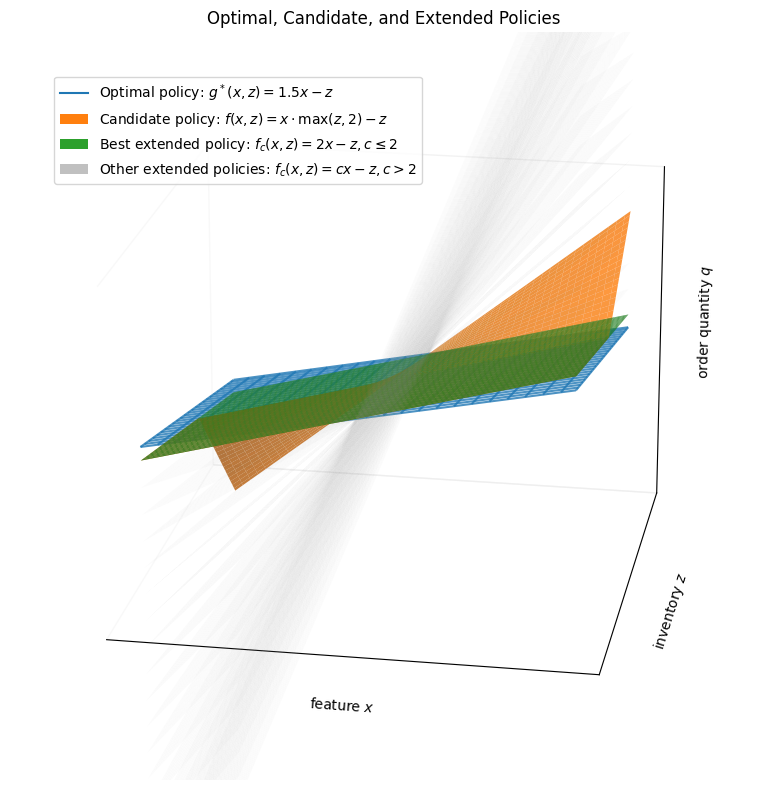

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Grid
x = np.linspace(-3.5, 3.5, 150)
z = np.linspace(-4.0, 6.0, 150)
X, Z = np.meshgrid(x, z)

# Policies
Q_opt = 1.5 * X - Z
Q_cand = X * np.maximum(Z, 2.0) - Z

# Extended policies for several c
c_vals = np.arange(2,20,1)
Q_ext_list = [(c, X * np.maximum(c, 2.0) - Z) for c in c_vals]

# Colors
opt_color = "tab:blue"
cand_color = "tab:orange"
ext_color = "tab:green"

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# 1) Extended c>2 first (wireframe, very light)
for (c, Qext) in Q_ext_list[1:]:
    ax.plot_surface(
        X, Z, Qext,
        color="silver",
        linewidth=0,
        alpha=0.03
    )

# 2) Optimal policy (solid surface)
ax.plot_wireframe(
    X, Z, Q_opt,
    color=opt_color,
    alpha=0.8,
    rcount=25, ccount=25,
    linewidth=1.5
)

# 3) Candidate policy (wireframe, darker)
ax.plot_surface(
    X, Z, Q_cand,
    color=cand_color,
    alpha=0.8,
    linewidth=0.0
)

# 4) Extended c<=2 (wireframe)
c, Qext = Q_ext_list[0]
ax.plot_surface(
    X, Z, Qext,
    color=ext_color,
    alpha=0.8,
    linewidth=0.0
)

# Labels
ax.set_title("Optimal, Candidate, and Extended Policies")
ax.set_xlabel(r"feature $x$")
ax.set_ylabel(r"inventory $z$")
ax.set_zlabel(r"order quantity $q$")
ax.view_init(elev=20, azim=-80)
ax.set_zlim(-25,20)
# not show the grid
ax.grid(False)
# Remove axes panes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# set the axes lines just to black in the inner box and no ticks
ax.xaxis.line.set_color("black")
ax.yaxis.line.set_color("black")
ax.zaxis.line.set_color("black")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Legend
legend_elements = [
    Line2D([0], [0], color=opt_color, lw=1.5, label=r"Optimal policy: $g^*(x,z)=1.5x-z$"),
    Patch(facecolor=cand_color, label=r"Candidate policy: $f(x,z)=x\cdot \max(z,2)-z$"),
    Patch(facecolor=ext_color, label=r"Best extended policy: $f_c(x,z)=2x-z,c\leq 2$"),
    Patch(facecolor="silver", label=r"Other extended policies: $f_c(x,z)=cx-z,c> 2$"),
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.tight_layout()
plt.show()


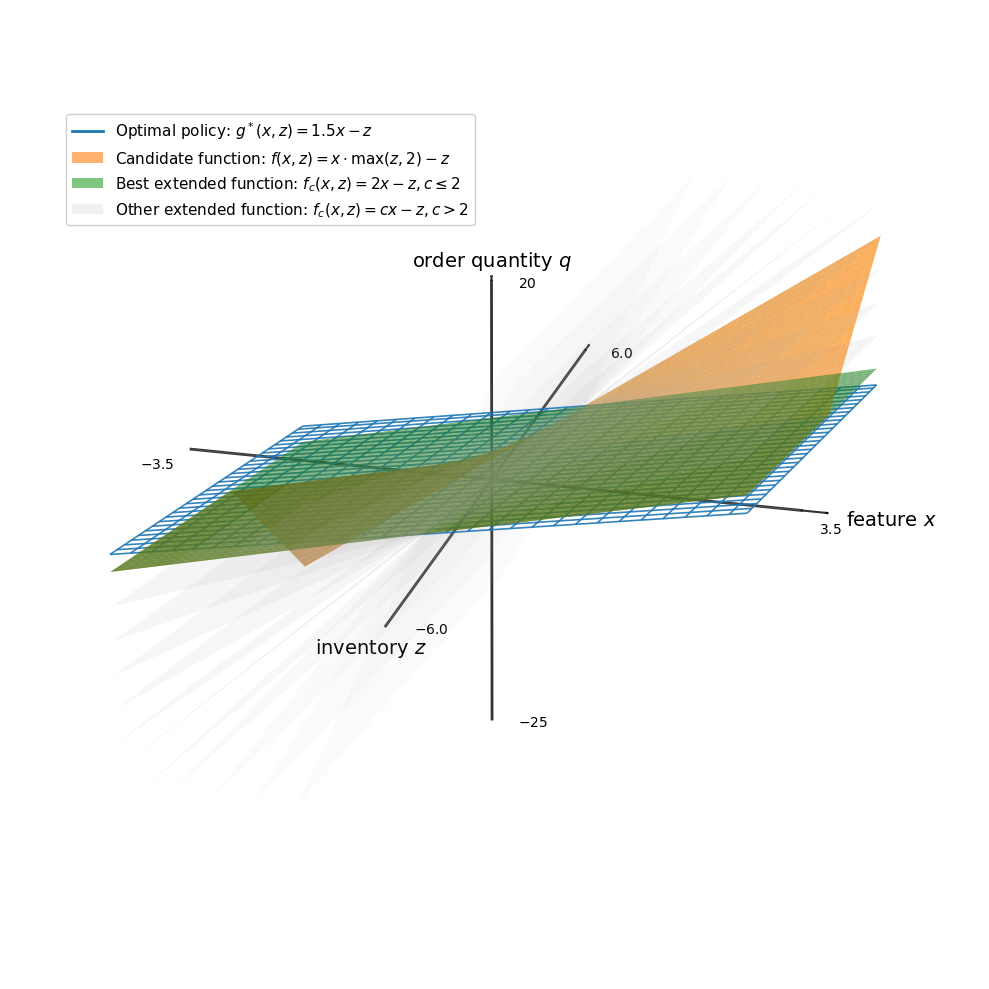

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Grid
x = np.linspace(-3.5, 3.5, 150)
z = np.linspace(-4.0, 6.0, 150)
X, Z = np.meshgrid(x, z)

# Policies
Q_opt = 1.5 * X - Z
Q_cand = X * np.maximum(Z, 2.0) - Z

# Extended policies for several c
c_vals = np.concatenate((np.arange(2, 10, 1), [7.8, 10, 12, 15, 20]))
Q_ext_list = [(c, X * np.maximum(c, 2.0) - Z) for c in c_vals]

# Colors
opt_color = "tab:blue"
cand_color = "tab:orange"
ext_color = "tab:green"

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. FIRST: Draw the coordinate axes with arrows
# Set axis limits first
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-4.0, 6.0)
ax.set_zlim(-25, 20)

# X-axis line and arrow
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='black', linewidth=2, alpha=0.8)
ax.quiver(3.5, 0, 0, 0.3, 0, 0, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(4.5, 0, 0, r"feature $x$", fontsize=14, ha='center', va='center')
ax.text(3.7, 0, -1, r"$3.5$", fontsize=10, ha='left', va='top')
ax.text(-3.7, 0, -1, r"$-3.5$", fontsize=10, ha='right', va='top')

# Y-axis line (z in our notation) and arrow
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='black', linewidth=2, alpha=0.8)
ax.quiver(0, 6.0, 0, 0, 0.3, 0, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(0, -6.8, 0, r"inventory $z$", fontsize=14, ha='center', va='center')
ax.text(0.3, 6.0, 0, r"$6.0$", fontsize=10, ha='left', va='center')
ax.text(0.3, -6.0, 0, r"$-6.0$", fontsize=10, ha='left', va='center')

# Z-axis line (q in our notation) and arrow
ax.plot([0, 0], [0, 0], [-25, 20], color='black', linewidth=2, alpha=0.8)
ax.quiver(0, 0, 20, 0, 0, 0.5, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(0, 0, 22, r"order quantity $q$", fontsize=14, ha='center', va='center')
ax.text(0.3, 0, 20, r"$20$", fontsize=10, ha='left', va='center')
ax.text(0.3, 0, -25, r"$-25$", fontsize=10, ha='left', va='center')

# Add grid lines at the origin planes for better orientation
# X-Z plane at y=0 (z=0 in our notation)
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
# Y-Z plane at x=0
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
# X-Y plane at q=0
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)

# 2. SECOND: Draw many light-colored extended policy planes
for (c, Qext) in Q_ext_list[1:]:  # Skip the first one (c=2) which we'll draw separately
    # Clip the Qext values to the z-axis limits
    Qext_clipped = np.clip(Qext, -25, 20)
    
    # Create a mask to only show surfaces within our coordinate bounds
    # We'll also mask out values that are too extreme for better visualization
    mask = (Qext >= -25) & (Qext <= 20)
    
    # Apply the mask - where mask is False, set to NaN so it won't be drawn
    Qext_masked = np.where(mask, Qext_clipped, np.nan)
    
    # Create a more transparent version for areas far from the optimal
    # This helps show which extended policies are closer to optimal
    alpha_val = 0.08 * (1 - min(1.0, abs(c - 1.5) / 10))  # c closer to 1.5 = more visible
    
    ax.plot_surface(
        X, Z, Qext_masked,
        color="lightgray",
        linewidth=0,
        alpha=alpha_val + 0.05,  # Ensure minimum visibility
        antialiased=True
    )

# 3. THIRD: Draw the three main planes
# Optimal policy (wireframe/网格)
ax.plot_wireframe(
    X, Z, Q_opt,
    color=opt_color,
    alpha=0.9,
    rcount=30, ccount=30,
    linewidth=1.2
)

# Candidate policy (surface)
ax.plot_surface(
    X, Z, Q_cand,
    color=cand_color,
    alpha=0.6,
    linewidth=0.0,
    antialiased=True
)

# Best extended policy (c=2) (surface)
c, Qext = Q_ext_list[0]
ax.plot_surface(
    X, Z, Qext,
    color=ext_color,
    alpha=0.6,
    linewidth=0.0,
    antialiased=True
)

# 4. Add a highlight to show where candidate and best extended policy match
# This is where z >= 2
z_threshold = 2.0
mask = Z >= z_threshold
Q_match = np.where(mask, Q_cand, np.nan)

# Plot the matching region with a subtle effect
ax.plot_surface(
    X, Z, Q_match,
    color='yellow',
    alpha=0.15,
    linewidth=0,
    antialiased=True
)

# Title and view
ax.view_init(elev=22, azim=-75)

# Remove background grids and panes
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
# the lines are also removed
ax.xaxis.line.set_color("none")
ax.yaxis.line.set_color("none")
ax.zaxis.line.set_color("none")

# Remove ticks but keep axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Add a custom legend
legend_elements = [
    Line2D([0], [0], color=opt_color, lw=2, label=r"Optimal policy: $g^*(x,z)=1.5x-z$"),
    Patch(facecolor=cand_color, alpha=0.6, label=r"Candidate function: $f(x,z)=x\cdot \max(z,2)-z$"),
    Patch(facecolor=ext_color, alpha=0.6, label=r"Best extended function: $f_c(x,z)=2x-z, c\leq 2$"),
    Patch(facecolor="lightgray", alpha=0.3, label=r"Other extended function: $f_c(x,z)=cx-z, c> 2$"),
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.05, 0.9),
          fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.show()

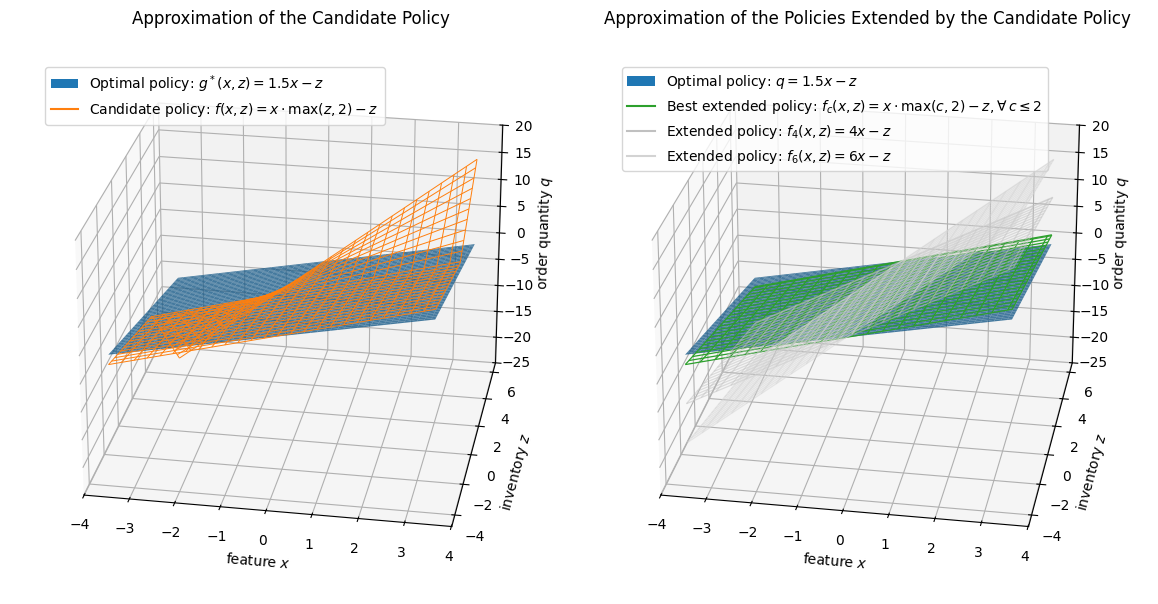

In [57]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Grid
x = np.linspace(-3.5, 3.5, 150)
z = np.linspace(-4.0, 6.0, 150)
X, Z = np.meshgrid(x, z)

# Policies
Q_opt = 1.5 * X - Z
Q_cand = X * np.maximum(Z, 2.0) - Z

# Extended policies for several c
c_vals = [1.5, 4.0, 6.0]
Q_ext_list = [(c, X * np.maximum(c, 2.0) - Z) for c in c_vals]

# Colors
opt_color = "tab:blue"
cand_color = "tab:orange"
ext_color = ["tab:green", "silver", "lightgrey"]

# Create figure with 2 subplots
fig = plt.figure(figsize=(12, 7))

# ------------------- First Subplot: Optimal and Candidate only -------------------
ax1 = fig.add_subplot(121, projection='3d')

# 1) Optimal policy (solid surface)
ax1.plot_surface(
    X, Z, Q_opt,
    color=opt_color,
    alpha=0.8,
    linewidth=0
)

# 2) Candidate policy (wireframe, darker)
ax1.plot_wireframe(
    X, Z, Q_cand,
    color=cand_color,
    rcount=25, ccount=25,
    linewidth=0.7
)

# Labels
ax1.set_title("Approximation of the Candidate Policy")
ax1.set_xlabel(r"feature $x$")
ax1.set_ylabel(r"inventory $z$")
ax1.set_zlabel(r"order quantity $q$")
ax1.view_init(elev=25, azim=-80)

# Legend for first subplot
legend_elements1 = [
    Patch(facecolor=opt_color, label=r"Optimal policy: $g^*(x,z)=1.5x-z$"),
    Line2D([0], [0], color=cand_color, lw=1.5, label=r"Candidate policy: $f(x,z)=x\cdot \max(z,2)-z$"),
]

ax1.legend(handles=legend_elements1, loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax1.set_zlim(-25, 20)


# ------------------- Second Subplot: Optimal and all Extended -------------------
ax2 = fig.add_subplot(122, projection='3d')

# 1) Extended c>2 first (wireframe, very light)
for (c, Qext), col in zip(Q_ext_list[1:], ext_color[1:]):
    ax2.plot_wireframe(
        X, Z, Qext,
        color=col,
        rcount=22, ccount=22,
        linewidth=0.9,
        alpha=0.5
    )

# 2) Optimal policy (solid surface)
ax2.plot_surface(
    X, Z, Q_opt,
    color=opt_color,
    alpha=0.8,
    linewidth=0
)

# 3) Extended c<=2 (wireframe)
c, Qext = Q_ext_list[0]
ax2.plot_wireframe(
    X, Z, Qext,
    color=ext_color[0],
    rcount=22, ccount=22,
    linewidth=0.9
)

# Labels
ax2.set_title("Approximation of the Policies Extended by the Candidate Policy")
ax2.set_xlabel(r"feature $x$")
ax2.set_ylabel(r"inventory $z$")
ax2.set_zlabel(r"order quantity $q$")
ax2.view_init(elev=25, azim=-80)

# Legend for second subplot
legend_elements2 = [
    Patch(facecolor=opt_color, label=r"Optimal policy: $q=1.5x-z$"),
    Line2D([0], [0], color=ext_color[0], lw=1.5, label=r"Best extended policy: $f_c(x,z)=x\cdot\max(c,2)-z, \forall\,c\leq 2$"),
    Line2D([0], [0], color=ext_color[1], lw=1.5, label=r"Extended policy: $f_4(x,z)=4x-z$"),
    Line2D([0], [0], color=ext_color[2], lw=1.5, label=r"Extended policy: $f_6(x,z)=6x-z$"),
]

ax2.legend(handles=legend_elements2, loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax2.set_zlim(-25, 20)

plt.tight_layout()
plt.savefig("example.jpg", dpi=300)
plt.show()

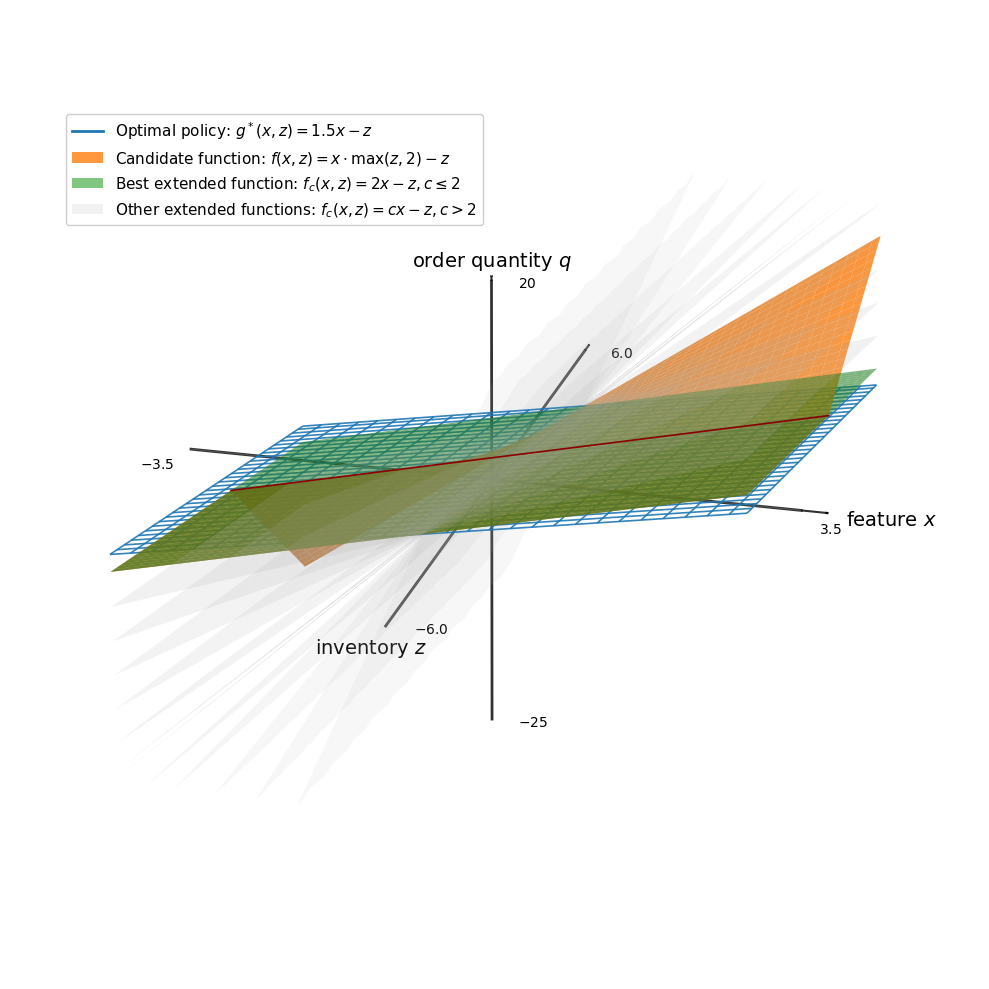

In [71]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Grid
x = np.linspace(-3.5, 3.5, 150)
z = np.linspace(-4.0, 6.0, 150)
X, Z = np.meshgrid(x, z)

# Policies
Q_opt = 1.5 * X - Z
Q_cand = X * np.maximum(Z, 2.0) - Z

# Extended policies for several c
c_vals = np.concatenate((np.arange(2, 10, 1), [7.8, 10, 12, 15, 20]))
Q_ext_list = [(c, X * np.maximum(c, 2.0) - Z) for c in c_vals]

# Colors
opt_color = "tab:blue"
cand_color = "tab:orange"
ext_color = "tab:green"

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. FIRST: Draw the coordinate axes with arrows
# Set axis limits first
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-4.0, 6.0)
ax.set_zlim(-25, 20)

# X-axis line and arrow
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='black', linewidth=2, alpha=0.8)
ax.quiver(3.5, 0, 0, 0.3, 0, 0, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(4.5, 0, 0, r"feature $x$", fontsize=14, ha='center', va='center')
ax.text(3.7, 0, -1, r"$3.5$", fontsize=10, ha='left', va='top')
ax.text(-3.7, 0, -1, r"$-3.5$", fontsize=10, ha='right', va='top')

# Y-axis line (z in our notation) and arrow
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='black', linewidth=2, alpha=0.8)
ax.quiver(0, 6.0, 0, 0, 0.3, 0, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(0, -6.8, 0, r"inventory $z$", fontsize=14, ha='center', va='center')
ax.text(0.3, 6.0, 0, r"$6.0$", fontsize=10, ha='left', va='center')
ax.text(0.3, -6.0, 0, r"$-6.0$", fontsize=10, ha='left', va='center')

# Z-axis line (q in our notation) and arrow
ax.plot([0, 0], [0, 0], [-25, 20], color='black', linewidth=2, alpha=0.8)
ax.quiver(0, 0, 20, 0, 0, 0.5, color='black', linewidth=1.5, 
          arrow_length_ratio=0.1, alpha=0.8)
ax.text(0, 0, 22, r"order quantity $q$", fontsize=14, ha='center', va='center')
ax.text(0.3, 0, 20, r"$20$", fontsize=10, ha='left', va='center')
ax.text(0.3, 0, -25, r"$-25$", fontsize=10, ha='left', va='center')

# Add grid lines at the origin planes for better orientation
# X-Z plane at y=0 (z=0 in our notation)
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
# Y-Z plane at x=0
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
# X-Y plane at q=0
ax.plot([-3.5, 3.5], [0, 0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)
ax.plot([0, 0], [-6.0, 6.0], [0, 0], color='gray', linewidth=0.5, alpha=0.3)

# 2. SECOND: Draw many light-colored extended policy planes
for (c, Qext) in Q_ext_list[1:]:  # Skip the first one (c=2) which we'll draw separately
    # Clip the Qext values to the z-axis limits
    Qext_clipped = np.clip(Qext, -25, 20)
    
    # Create a mask to only show surfaces within our coordinate bounds
    # We'll also mask out values that are too extreme for better visualization
    mask = (Qext >= -25) & (Qext <= 20)
    
    # Apply the mask - where mask is False, set to NaN so it won't be drawn
    Qext_masked = np.where(mask, Qext_clipped, np.nan)
    
    # Create a more transparent version for areas far from the optimal
    # This helps show which extended policies are closer to optimal
    alpha_val = 0.08 * (1 - min(1.0, abs(c - 1.5) / 10))  # c closer to 1.5 = more visible
    
    ax.plot_surface(
        X, Z, Qext_masked,
        color="lightgray",
        linewidth=0,
        alpha=alpha_val + 0.1,  # Ensure minimum visibility
        antialiased=True,
        zorder=1
    )

# 3. HIGHLIGHT THE z=2 THRESHOLD IN MULTIPLE WAYS
z_threshold = 2.0

# Method 1: Draw a vertical plane at z=2 (most visible)
# Create a vertical plane at z=2
x_plane = np.linspace(-3.5, 3.5, 50)
q_plane = np.linspace(-25, 20, 50)
X_plane, Q_plane = np.meshgrid(x_plane, q_plane)
Z_plane = np.full_like(X_plane, z_threshold)

# Method 5: Highlight the region where candidate changes
# This is where z >= 2
mask = Z >= z_threshold
Q_match = np.where(mask, Q_cand, np.nan)

# 4. FOURTH: Draw the three main planes
# Optimal policy (wireframe/网格)
ax.plot_wireframe(
    X, Z, Q_opt,
    color=opt_color,
    alpha=0.9,
    rcount=30, ccount=30,
    linewidth=1.2,
    zorder=20
)

# Candidate policy (surface)
ax.plot_surface(
    X, Z, Q_cand,
    color=cand_color,
    alpha=0.8,
    linewidth=0.0,
    antialiased=True,
    zorder=30
)

# Best extended policy (c=2) (surface)
c, Qext = Q_ext_list[0]
ax.plot_surface(
    X, Z, Qext,
    color=ext_color,
    alpha=0.6,
    linewidth=0.0,
    antialiased=True,
    zorder=40
)

# on the top, some dark red color
ax.plot([-3.5, 3.5], [z_threshold, z_threshold], [-3.5*2 - z_threshold, 3.5*2 - z_threshold], 
        color='darkred', linewidth=1.2, alpha=1.0, linestyle='-', zorder=100)

# Title and view
ax.view_init(elev=22, azim=-75)

# Remove background grids and panes
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
# the lines are also removed
ax.xaxis.line.set_color("none")
ax.yaxis.line.set_color("none")
ax.zaxis.line.set_color("none")

# Remove ticks but keep axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Add a custom legend
legend_elements = [
    Line2D([0], [0], color=opt_color, lw=2, label=r"Optimal policy: $g^*(x,z)=1.5x-z$"),
    Patch(facecolor=cand_color, alpha=0.8, label=r"Candidate function: $f(x,z)=x\cdot \max(z,2)-z$"),
    Patch(facecolor=ext_color, alpha=0.6, label=r"Best extended function: $f_c(x,z)=2x-z, c\leq 2$"),
    Patch(facecolor="lightgray", alpha=0.3, label=r"Other extended functions: $f_c(x,z)=cx-z, c> 2$")
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.05, 0.9),
          fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.savefig("example_one.jpg", dpi=300)
plt.show()